In [ ]:
#pip install pandas seaborn matplotlib gradio ollama

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
url = r"titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Display dataset info
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


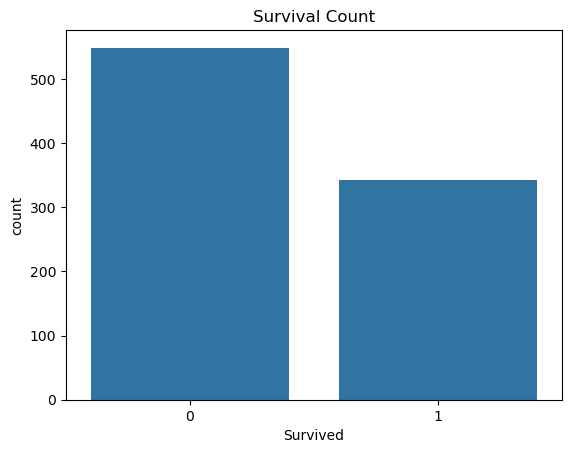

In [5]:
# Survival Rate Visualization
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

In [11]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)


🔹 AI-Generated Insights:
  This dataset appears to be the well-known Titanic dataset, which contains information about passengers who boarded the RMS Titanic for its maiden voyage from Southampton to New York City in 1912. Here are some key insights based on the summary statistics provided:

1. The total number of unique passenger IDs is 891. This indicates that there were 891 passengers in total.

2. The mean (average) survival rate was 0.384, suggesting that a majority of passengers did not survive the sinking of the Titanic.

3. The average age of the passengers was approximately 29.7 years old, with a standard deviation of around 14.5 years. This suggests a wide range in ages among the passengers.

4. The mean Pclass is 2.309, suggesting that most passengers were traveling in second or third class. This is not surprising as a large majority of first-class passengers were saved due to priority given to them during evacuation.

5. The average number of siblings and parents accompany

In [13]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch(share=True)  # Use share=True for Google Colab


* Running on local URL:  http://127.0.0.1:7861


OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software: 'C:\\Users\\Deepti Jaiswar\\.cache\\huggingface\\gradio\\frpc\\frpc_windows_amd64_v0.3'

In [9]:
#!pip install ollama

  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 15.5 MB/s eta 0:00:00
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.20.1
    Uninstalling pydantic_core-2.20.1:
      Successfully uninstalled pydantic_core-2.20.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2


In [10]:
#!pip install gradio

   ---------------------------------------- 0.0/46.9 MB ? eta -:--:--
   ---- ----------------------------------- 5.0/46.9 MB 25.2 MB/s eta 0:00:02
   ----- ---------------------------------- 6.8/46.9 MB 16.8 MB/s eta 0:00:03
   --------- ------------------------------ 11.5/46.9 MB 19.5 MB/s eta 0:00:02
   ------------ --------------------------- 14.4/46.9 MB 17.8 MB/s eta 0:00:02
   --------------- ------------------------ 18.1/46.9 MB 17.8 MB/s eta 0:00:02
   ----------------- ---------------------- 20.4/46.9 MB 17.2 MB/s eta 0:00:02
   ------------------- -------------------- 22.5/46.9 MB 15.8 MB/s eta 0:00:02
   --------------------- ------------------ 25.4/46.9 MB 15.8 MB/s eta 0:00:02
   ------------------------ --------------- 29.1/46.9 MB 15.9 MB/s eta 0:00:02
   ---------------------------- ----------- 33.0/46.9 MB 16.3 MB/s eta 0:00:01
   ------------------------------- -------- 36.4/46.9 MB 16.5 MB/s eta 0:00:01
   -------------------------------- ------- 38.3/46.9 MB 15.7 M